# Task 1 - Prediction using Supervised ML

## Name: Emad Magdy

### Goal : Predict the percentage of an student based on the no. of study hours 

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading dataset

In [2]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

In [3]:
# read dataset from url
df = pd.read_csv(url)

### Exploring data

In [4]:
# show the first 5 rows
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# shape of data
df.shape

(25, 2)

In [7]:
# check if there are nan values in data
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
# statistical analysis
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Distribution of scores

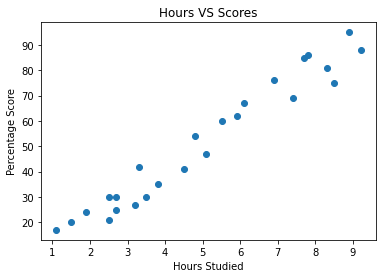

In [9]:
# scatter plot to show the relation between 2 columns
plt.scatter(df['Hours'],df['Scores'])
plt.title('Hours VS Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From this visualization, there is a positive linear relation between the number of hours studied and percentage of score.**

### Preparing data for ML Model

In [10]:
# divide data to X(input feature) and y(target)
X = df[['Hours']].values
y = df['Scores'].values

### Splitting data

In [11]:
# split data to training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [12]:
# shape of X_train and x_test
print (f'The shape of X_train is: {X_train.shape}')
print (f'The shape of X_test is: {X_test.shape}')

The shape of X_train is: (20, 1)
The shape of X_test is: (5, 1)


### Training the model

In [13]:
# import library for ML model and fit data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [14]:
# View parameters
w = model.coef_        
b = model.intercept_   
print(f"model parameters: W:{round(w[0],2)}, b:{round(b,2)}")

model parameters: W:9.68, b:2.83


### Predicting the scores

In [15]:
# predict the scores in x_test
y_predict = model.predict(X_test)
y_predict

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [16]:
# comparing between actual scores and predicted scores
df_predict = pd.DataFrame({'Acutal Scores':y_test, 'Predicted Scores':y_predict})
df_predict

,Acutal Scores,Predicted Scores
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


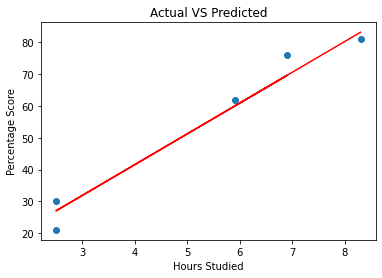

In [17]:
# plot the predicted scores
plt.scatter(X_test,y_test)
plt.plot(X_test,y_predict,c='r')
plt.title('Actual VS Predicted')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

### Evaluting the model

In [18]:
# accuracy of the model
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_predict)

3.9207511902099244

### What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [19]:
pred = model.predict([[9.25]])
print(f"Predicted score = {round(pred[0],2)}")

Predicted score = 92.39


**If a student studies for 9.25 hours in a day, the expected score is 92.39**